In [45]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import seaborn as cb
from pyvis.network import Network
import json
import numpy as np
import nltk 
from nltk import bigrams
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import re
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import collections


tweets_list1 = []

#scrape data and append tweets to list
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('Covid Vaccine since:2021-12-10 until:2022-02-20').get_items()): # declare a username
  if i>2000: #number of tweets you want to scrape
    break
  tweets_list1.append([tweet.content]) # declare the attributes to be returned

# creating a dataframe from the list
tweets_df1 = pd.DataFrame(tweets_list1, columns=['Text'])

C:\Users\djona\AppData\Local\Temp\ipykernel_20448\3620960423.py:24: FutureWarning: content is deprecated, use rawContent instead
  tweets_list1.append([tweet.content]) # declare the attributes to be returned


In [46]:
file = open("tweets1.json",'w')
j = json.dumps(tweets_list1, default = str)
file.write(j)
file.close()

In [52]:
def clean_text(txt):
    #url_pat = re.compile(r'https?//\s+|www\.\S+')
    cleaned = re.sub(r"http\S+","", txt)
    return cleaned

In [74]:
cleaned_text = [clean_text(elements) for elements in tweets_df1.Text]
tt = TweetTokenizer()
normalize = [tt.tokenize(elements.lower()) for elements in cleaned_text]

In [55]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\djona\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
stop_words = set(stopwords.words('english'))
stop_words.add('covid')
stop_words.add('vaccine')
#tokenization
#word_tokens = [word_tokenize(elements) for elements in normalize]

# remove stop words and punctuation
complete = [[w for w in words if not w in stop_words if w.isalnum()] for words in normalize]


In [77]:
bigramy = [list(bigrams(words)) for words in complete]


In [78]:
bigrame = list(itertools.chain(*bigramy))
bigram_counter = collections.Counter(bigrame)
bigram_counter.most_common(20)

[(('dose', 'dose'), 157),
 (('slots', '0'), 77),
 (('free', 'slots'), 66),
 (('paid', 'slots'), 66),
 (('slots', 'dose'), 55),
 (('0', 'paid'), 44),
 (('availability', 'pm'), 36),
 (('pm', 'free'), 36),
 (('fourth', 'shot'), 35),
 (('45', 'availability'), 33),
 (('side', 'effects'), 30),
 (('availability', 'free'), 30),
 (('shot', 'necessary'), 29),
 (('drug', 'regulators'), 27),
 (('regulators', 'bar'), 27),
 (('bar', 'billion'), 27),
 (('billion', 'people'), 27),
 (('dose', 'paid'), 22),
 (('nicki', 'minaj'), 21),
 (('health', 'dept'), 21)]

In [85]:
bigram_df = pd.DataFrame(bigram_counter.most_common(200), columns=['bigram','count'])
bigram_df

,bigram,count
0,"(dose, dose)",157
1,"(slots, 0)",77
2,"(free, slots)",66
3,"(paid, slots)",66
4,"(slots, dose)",55
...,...,...
195,"(mask, mandates)",6
196,"(cards, longer)",6
197,"(required, restaurants)",6
198,"(restaurants, hang)",6


In [86]:
d = bigram_df.set_index('bigram').T.to_dict('records')

In [87]:
G = nx.Graph()

for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

In [88]:
G.number_of_nodes()

219

In [89]:
net = Network(notebook=True)
net.from_nx(G)
net.show("graph.html")

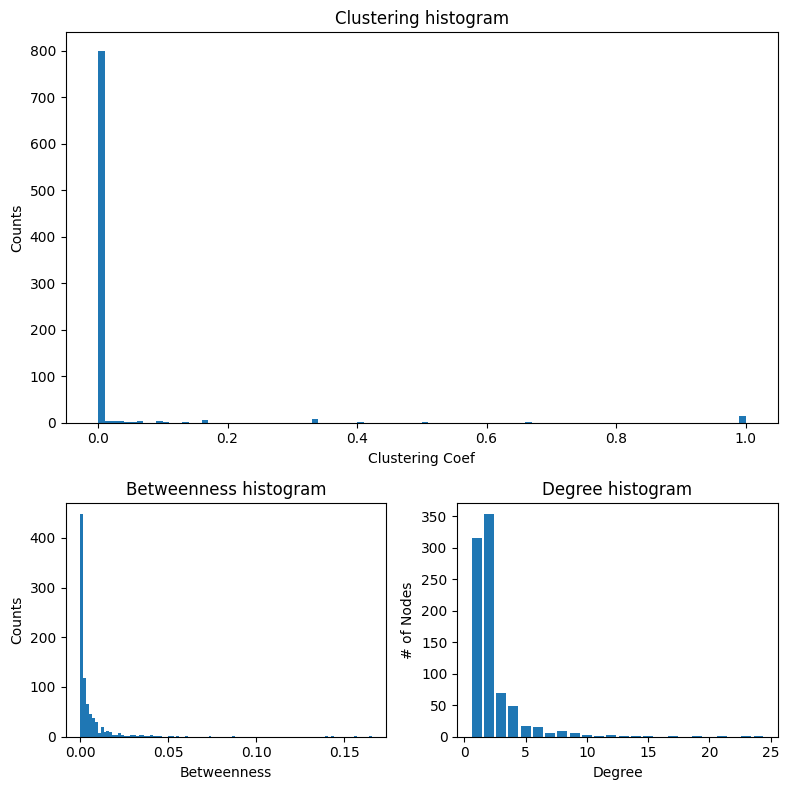

In [83]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

centrality = nx.betweenness_centrality(G)

clustering = nx.clustering(G)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax = fig.add_subplot(axgrid[0:3,:])
ax.hist(clustering.values(), bins=100)
ax.set_title("Clustering histogram")
ax.set_xlabel("Clustering Coef")
ax.set_ylabel("Counts")


ax1 = fig.add_subplot(axgrid[3:,:2])
ax1.hist(centrality.values(), bins=100)
ax1.set_title("Betweenness histogram")
ax1.set_xlabel("Betweenness")
ax1.set_ylabel("Counts")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [91]:
tweets_list2 = []
#scrape data and append tweets to list
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('Covid Vaccine since:2022-02-25 until:2022-04-01').get_items()): # declare a username
  if i>2000: #number of tweets you want to scrape
    break
  tweets_list2.append([tweet.content]) # declare the attributes to be returned

# creating a dataframe from the list
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Text'])

C:\Users\djona\AppData\Local\Temp\ipykernel_20448\1281156272.py:6: FutureWarning: content is deprecated, use rawContent instead
  tweets_list2.append([tweet.content]) # declare the attributes to be returned


In [92]:
file = open("tweets2.json",'w')
j = json.dumps(tweets_list2, default = str)
file.write(j)
file.close()

In [ ]:
cleaned_text2 = [clean_text(elements) for elements in tweets_df2.Text]
normalize2 = [tt.tokenize(elements.lower()) for elements in cleaned_text]